## *App Rating Prediction*

- 'Google Play' Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

Domain: General

- The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

In [1]:
# importing all the necessary libraries

import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now checking the working directory 
os.getcwd()

'C:\\Users\\Rohit Yadav'

In [3]:
# setting working directory where we have saved "googleapp file"

Wd = os.chdir("C:\\Users\\Rohit Yadav\\OneDrive\\Desktop\\app prediction")
data = pd.read_csv('googleplaystore.csv')

In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- *App*: Application name
- *Category*: Category to which the app belongs 
- *Rating*: Overall user rating of the app
- *Reviews*: Number of user reviews for the app
- *Size*: Size of the app
- *Installs*: Number of user downloads/installs for the app
- *Type*: Paid or Free
- *Price*: Price of the app
- *Content Rating*: Age group the app is targeted at - Children / Mature 21+ / Adult
- *Genres*: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong              Music, Game, Family genres.
- *Last Updated*: Date when the app was last updated on Play Store
- *Current Ver*: Current version of the app available on Play Store
- *Android Ver*: Minimum required Android version

In [5]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.tail(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Drop records with nulls in any of the columns.

In [8]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
data.dropna(how = 'any', inplace = True)

In [10]:
print(data.isnull().sum(axis = 0))

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


### -Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
        -Extract the numeric value from the column
         -Multiply the value by 1,000, if size is mentioned in Mb


In [11]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [12]:
data['Size_last'] = data['Size'].str.strip().str[-1] ## to get the last string elemnt

In [13]:
data.Size_last.unique()

array(['M', 'e', 'k'], dtype=object)

M, E, & K are the last value present into the data where we can see e is from "Varies with device"
.

In [14]:
Varies_with_device = data[(data['Size']== 'Varies with device')]

In [15]:
Varies_with_device 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,e
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,e
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,e
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,e
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,e
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,e
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,e
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,e


In [16]:
data = data[(data['Size'] != 'Varies with device')]

In [17]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [18]:
def removestring(size):
    string = size[-1].lower()  # Get the last character and convert to lowercase
    num = size[:-1]  # Remove the last character

    try:
        num = float(num)  # Convert the remaining string to a float
        if string == 'm':
            result = num * 1000
        elif string == 'k':
            result = num * 1
        else:
            result = num
        return result
    except ValueError:
        print("Invalid input. The string should end with a numeric value.")


In [19]:
data['Size'] = data['Size'].map(removestring)

In [20]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M


In [21]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,k
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,M
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,M
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,M
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,M


In [22]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [23]:
data['Size'] = pd.to_numeric(data['Size'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
 13  Size_last       7723 non-null   object 
dtypes: float64(2), object(12)
memory usage: 905.0+ KB


In [25]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

## Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [26]:
data['Reviews'] = pd.to_numeric(data['Reviews']) ## converting Reviews to numeric

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

In [27]:
data['Installs']=pd.to_numeric(data['Installs'].replace('[^0-9\.-]',"",regex = True))

In [28]:
data['Price']=pd.to_numeric(data['Price'].replace('[^0-9\.-]',"",regex = True))

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
 13  Size_last       7723 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 905.0+ KB


Now we have remove the symbols from the install and price field and converted into a numeric from object........

# Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [30]:
data_check = data[(data["Rating"]<1) &(data["Rating"]>5)]

In [31]:
data_check

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last


As we can see there is no value of rating below 1 and more than 5 into the rating we can move, so we conclude the data is between the range mentioned between 1 to 5.

### Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.



In [32]:
Installation_review = data[data["Installs"] < data["Reviews"]]

if not Installation_review.empty:
    print ("There were invalid records :" )
    data.drop(Installation_review.index, inplace =True)
    print (" Records are dropped")
    
else:
    print ("no record found")

There were invalid records :
 Records are dropped


### For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [33]:
data[(data["Type"]=='Free')&(data['Price']>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last


## there is no such app which is free and has been charge...

In [34]:
def invalid_freeapp(data):
    data.drop(data[(data["Type"]=='Free')&(data['Price']>0)].index, inplace = True)
    return data

In [35]:
data = pd.DataFrame(data)

In [36]:
data[(data["Type"]=='Free')&(data['Price']>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last


In [37]:
duplicates = data.duplicated()
duplicate_rows = data[duplicates]

In [38]:
duplicate_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up,M
266,Zenefits,BUSINESS,4.2,296,14000.0,50000,Free,0.0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up,M
267,Google Ads,BUSINESS,4.3,29313,20000.0,5000000,Free,0.0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up,M
270,FreshBooks Classic,BUSINESS,4.1,1802,26000.0,100000,Free,0.0,Everyone,Business,"April 18, 2018",1.7.14,4.2 and up,M
271,Insightly CRM,BUSINESS,3.8,1383,51000.0,100000,Free,0.0,Everyone,Business,"July 12, 2018",3.24.1,5.0 and up,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,CT Scan Cross Sectional Anatomy,MEDICAL,4.3,10,46000.0,100,Free,0.0,Everyone,Medical,"July 19, 2018",5.0.16,4.1 and up,M
8632,Notepad & To do list,PRODUCTIVITY,4.3,226295,4200.0,10000000,Free,0.0,Everyone,Productivity,"June 6, 2018",4.3.19,2.3.3 and up,M
8635,"Polaris Office - Word, Docs, Sheets, Slide, PDF",PRODUCTIVITY,4.3,549900,60000.0,10000000,Free,0.0,Everyone,Productivity,"July 18, 2018",7.3.30,4.1 and up,M
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,10000,Free,0.0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up,M


In [39]:
data.drop_duplicates(inplace =True)

In [40]:
duplicates = data.duplicated()
duplicate_rows = data[duplicates]

In [41]:
duplicate_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last


In [42]:
data.Type.value_counts()

Free    6869
Paid     543
Name: Type, dtype: int64

In [43]:
df = data[data['Type']=='Free']

In [44]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M


In [45]:
df.Genres.value_counts()

Tools                          578
Entertainment                  417
Education                      388
Action                         294
Lifestyle                      256
                              ... 
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Strategy;Action & Adventure      1
Arcade;Pretend Play              1
Strategy;Creativity              1
Name: Genres, Length: 109, dtype: int64

In [46]:
category_vs_genres = df.groupby(['Category', 'Genres']).size().reset_index(name='count')

In [47]:
category_vs_genres.head(100)

,Category,Genres,count
0,ART_AND_DESIGN,Art & Design,49
1,ART_AND_DESIGN,Art & Design;Creativity,5
2,ART_AND_DESIGN,Art & Design;Pretend Play,1
3,AUTO_AND_VEHICLES,Auto & Vehicles,63
4,BEAUTY,Beauty,37
...,...,...,...
95,GAME,Casual;Brain Games,1
96,GAME,Casual;Creativity,1
97,GAME,Casual;Pretend Play,1
98,GAME,Music,14


In [48]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_last
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M


In [49]:
df = df.drop(['App','Genres','Last Updated', 'Current Ver', 'Android Ver', 'Size_last','Type'], axis = 1)

In [95]:
df.head(20)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,Everyone
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,Teen
4,ART_AND_DESIGN,4.3,967,2800.0,100000,0.0,Everyone
5,ART_AND_DESIGN,4.4,167,5600.0,50000,0.0,Everyone
6,ART_AND_DESIGN,3.8,178,19000.0,50000,0.0,Everyone
7,ART_AND_DESIGN,4.1,36815,29000.0,1000000,0.0,Everyone
8,ART_AND_DESIGN,4.4,13791,33000.0,1000000,0.0,Everyone
9,ART_AND_DESIGN,4.7,121,3100.0,10000,0.0,Everyone


In [96]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
median_value = df['Installs'].median()
df['Installs'] = df['Installs'].fillna(median_value)

In [97]:
df.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
dtype: int64

In [98]:
df.shape

(6869, 7)

just re-running and cleaning again from invalid prices...

## Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.



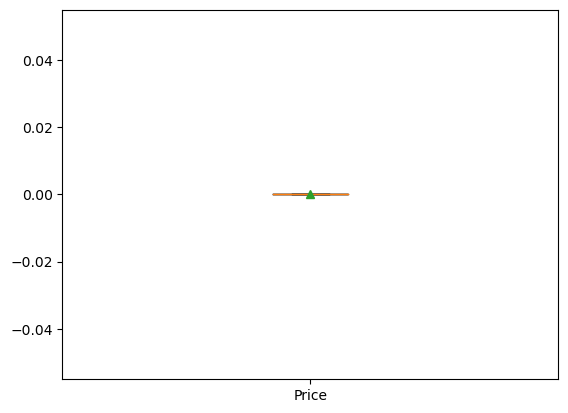

In [99]:
#Box plot for price

plt.boxplot(x = df["Price"],labels = ['Price'],showmeans=True)
plt.show()

From price box plot we can assume that most of the apps are free which cost $0 into the app store some are highly paid app, there are outliers present into the dataset.

### Price: From the box plot, it seems like there are some apps with very high price. 
### A price of $200 for an application on the Play Store is very high and suspicious!



In [100]:
data = df[df['Price'] <= 200] ## removing all the junk app which cost more than $200.

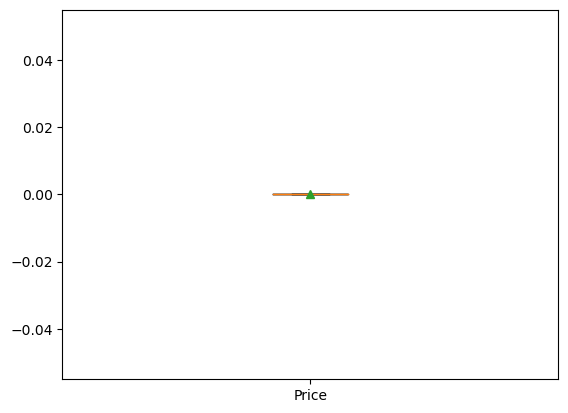

In [101]:
plt.boxplot(x = df["Price"],labels = ['Price'],showmeans=True)
plt.show()

### Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

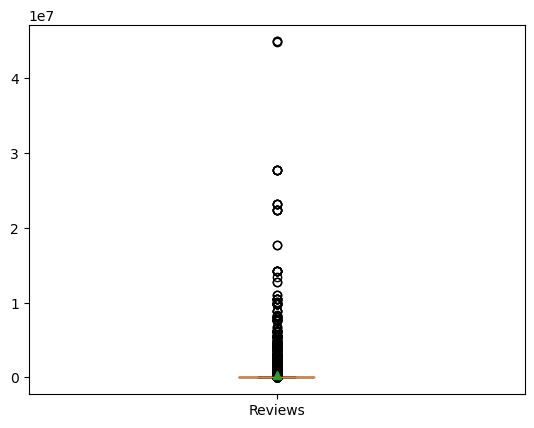

In [102]:
plt.boxplot(x = df["Reviews"],labels = ['Reviews'],showmeans=True)
plt.show()

### Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [103]:
df = df[df['Reviews'] <= 2000000] ## removing all the junk app which has review over 2M.....

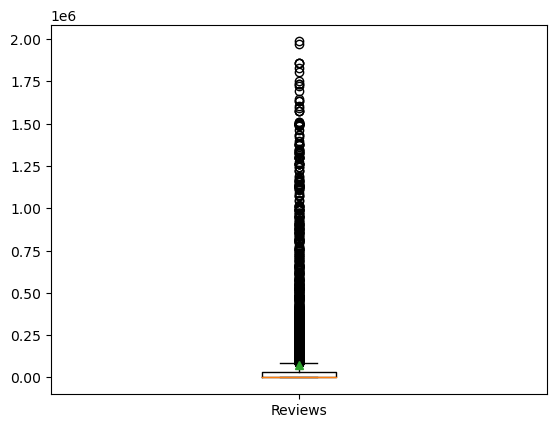

In [104]:
plt.boxplot(x = df["Reviews"],labels = ['Reviews'],showmeans=True)
plt.show()

## Histogram for Rating

### How are the ratings distributed? Is it more toward higher ratings?

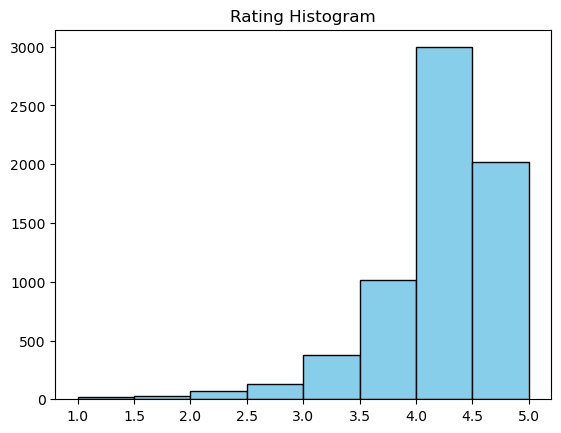

In [105]:
# histogram for the rating 

plt.hist(df['Rating'],bins = 8,color = 'skyblue',edgecolor = 'black')
plt.title('Rating Histogram')
plt.show()

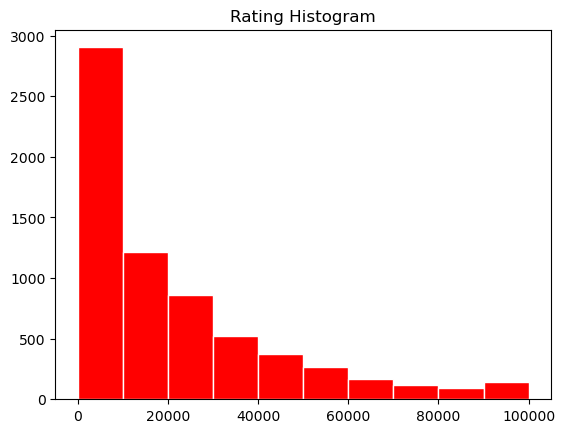

In [106]:
plt.hist(df['Size'],bins = 10,color = 'red',edgecolor = 'white')
plt.title('Rating Histogram')
plt.show()

## Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

### Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

### Decide a threshold as cutoff for outlier and drop records having values more than that.......

Decide a threshold as cutoff for outlier and drop records having values more than that.......

In [107]:
install_percentile_10 = df['Installs'].quantile(0.10)
install_percentile_25 = df['Installs'].quantile(0.25)
install_percentile_50 = df['Installs'].quantile(0.50)
install_percentile_70 = df['Installs'].quantile(0.70)
install_percentile_90 = df['Installs'].quantile(0.90)
install_percentile_95 = df['Installs'].quantile(0.95)
install_percentile_99 = df['Installs'].quantile(0.99)

print('install_percentile_10 :',install_percentile_10)
print('install_percentile_25 :',install_percentile_25)
print('install_percentile_50 :',install_percentile_50)
print('install_percentile_70 :',install_percentile_70)
print('install_percentile_90 :',install_percentile_90)
print('install_percentile_95 :',install_percentile_95)
print('install_percentile_99 :',install_percentile_99)

install_percentile_10 : 1000.0
install_percentile_25 : 10000.0
install_percentile_50 : 100000.0
install_percentile_70 : 1000000.0
install_percentile_90 : 10000000.0
install_percentile_95 : 10000000.0
install_percentile_99 : 50000000.0


In [108]:
data['Installs'] = df[(df['Installs'] > install_percentile_10) & (df['Installs'] < install_percentile_95)]['Installs']

## now we have limited value/set threshold as cutoff to 95% to remove the outliers values which are above 95% percentile value

### Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

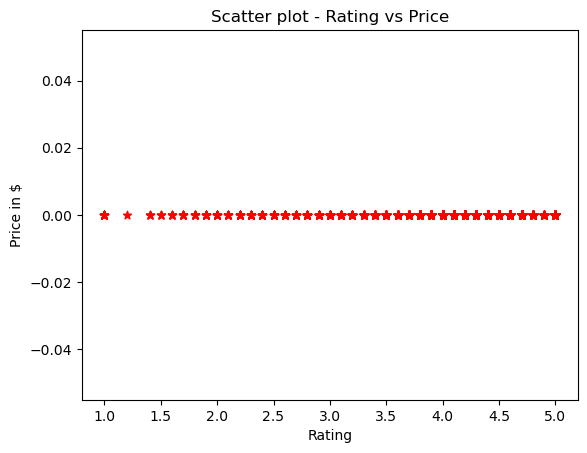

In [109]:
plt.scatter(df.Rating,df.Price, color = 'r',marker = '*')
plt.title("Scatter plot - Rating vs Price")
plt.xlabel("Rating")
plt.ylabel("Price in $")

plt.show()

The majority of apps in your dataset have prices that fall within the range of 0 to 20 dollars. This indicates that there are a significant number of free or low-priced apps available.
The concentration of data points in the lower price range suggests that users are more inclined to download and rate apps that are priced affordably. This could be attributed to the fact that lower-priced apps are more accessible and perceived as offering better value for money.

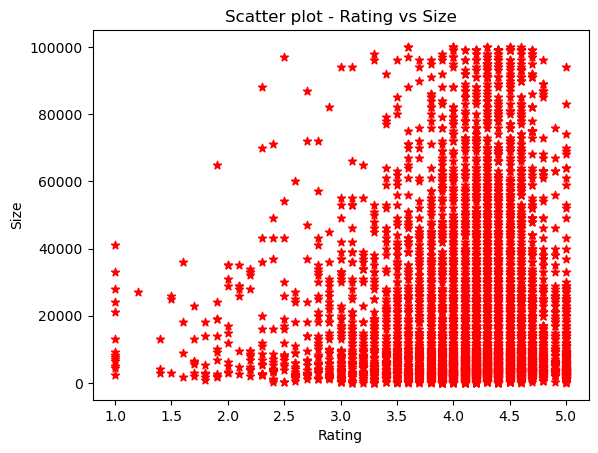

In [110]:
plt.scatter(df.Rating,df.Size, color = 'r',marker = '*')
plt.title("Scatter plot - Rating vs Size")
plt.xlabel("Rating")
plt.ylabel("Size")

plt.show()

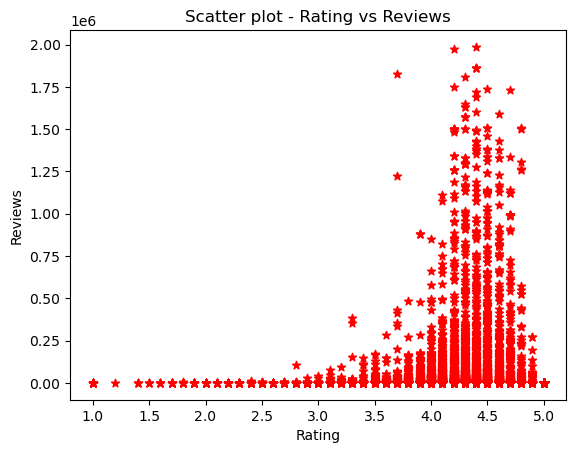

In [111]:
plt.scatter(df.Rating,df.Reviews, color = 'r',marker = '*')
plt.title("Scatter plot - Rating vs Reviews")
plt.xlabel("Rating")
plt.ylabel("Reviews")

plt.show()

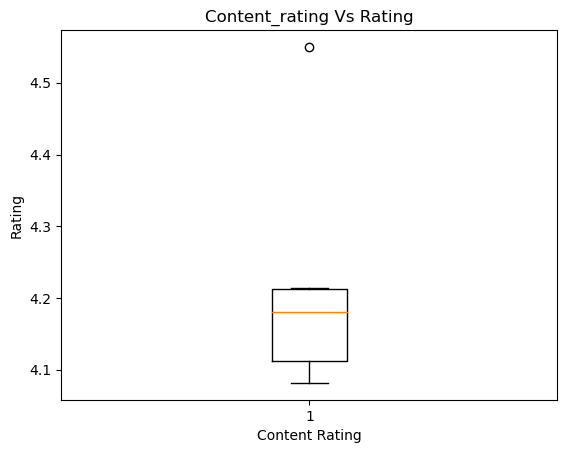

In [112]:
# box plot for rating vs content
rating_by_content = df.groupby('Content Rating')['Rating'].mean()
    
plt.boxplot(rating_by_content)
plt.title("Content_rating Vs Rating")
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.show()


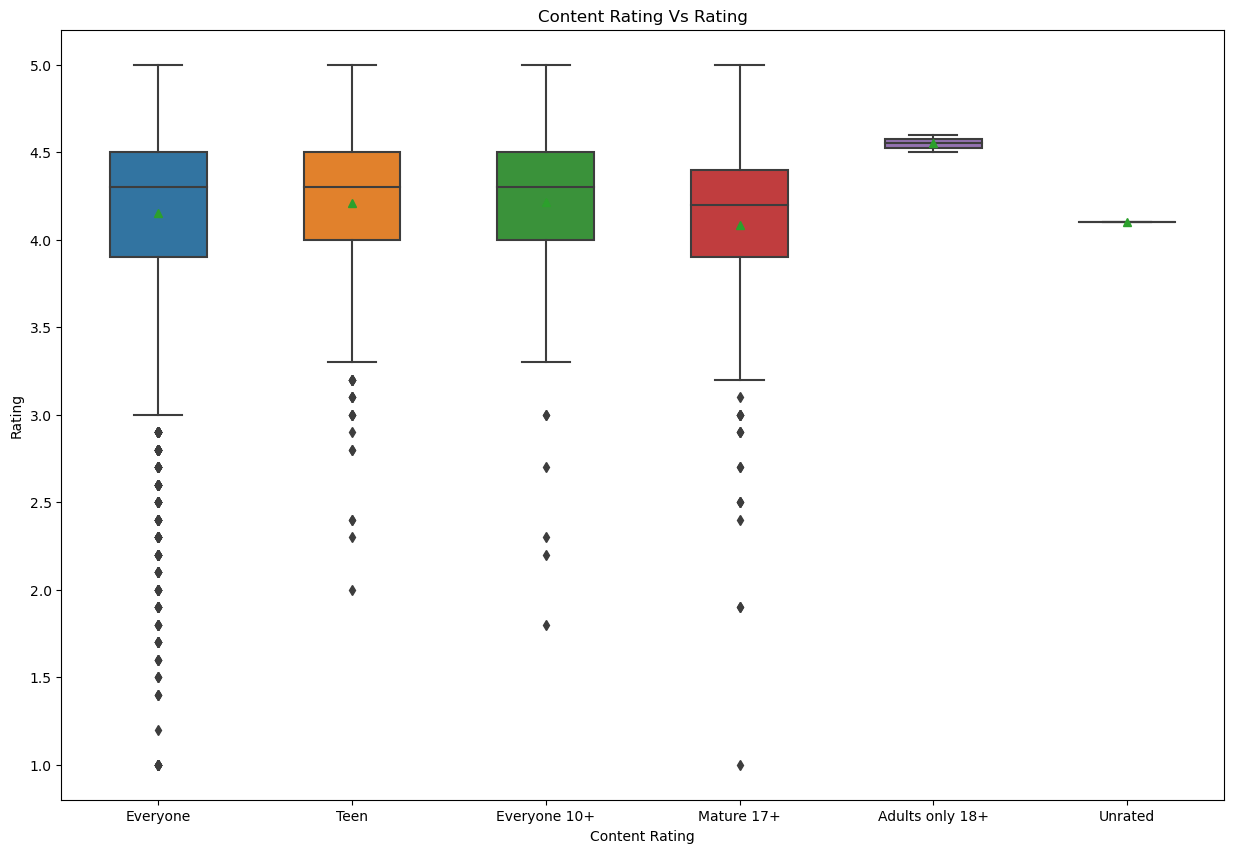

In [113]:
# box plot for rating vs content Rating
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Content Rating', y = 'Rating',data = df,showmeans=True, width = 0.5)
plt.title('Content Rating Vs Rating')
plt.show()

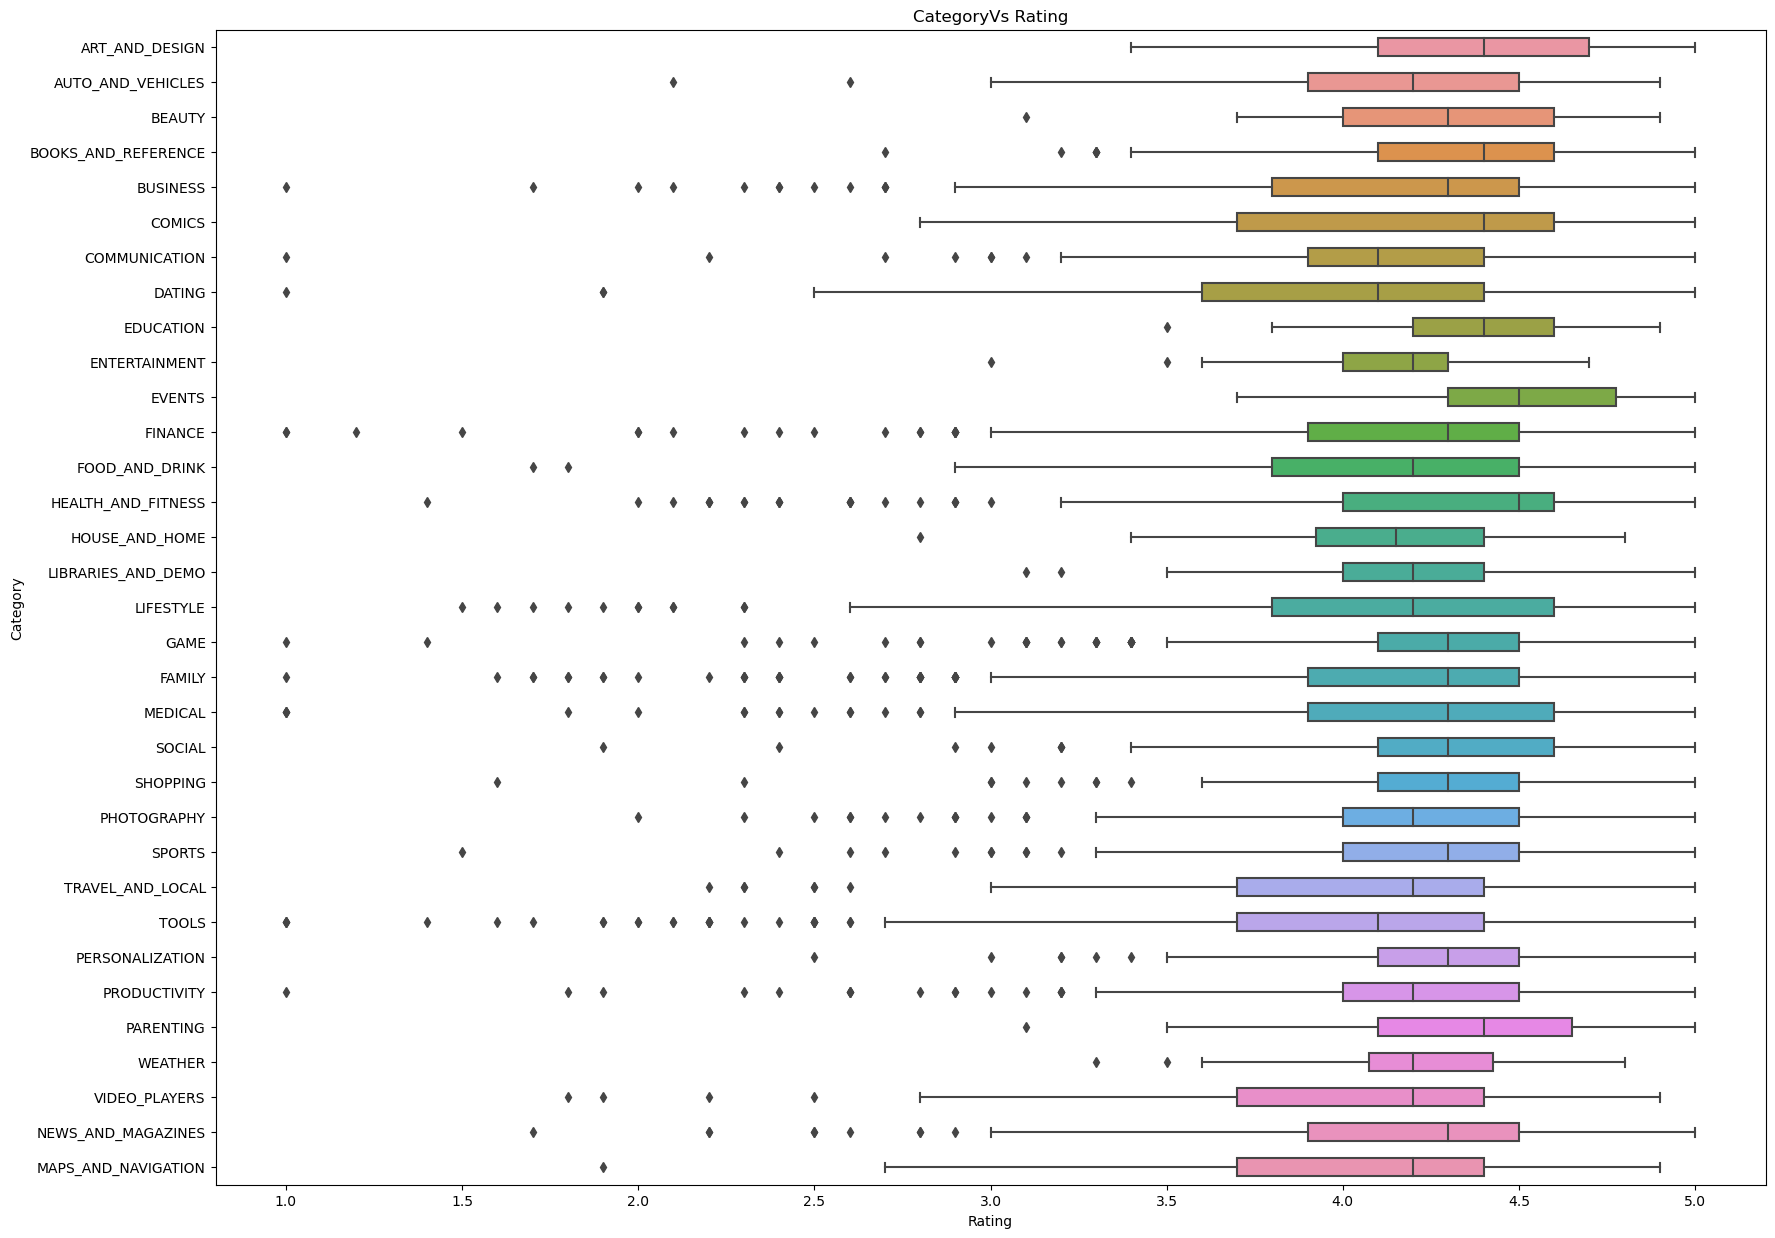

In [114]:
# box plot for rating vs Category
plt.figure(figsize=(20,15))
sns.boxplot(x = 'Rating', y = 'Category',data = df, width = 0.5)
plt.title('CategoryVs Rating')
plt.show()

# Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [115]:
inp1 = df.copy()

In [116]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,Everyone
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,Teen
4,ART_AND_DESIGN,4.3,967,2800.0,100000,0.0,Everyone


C:\Users\Rohit Yadav\AppData\Local\Temp\ipykernel_9388\3368193224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1.Reviews)


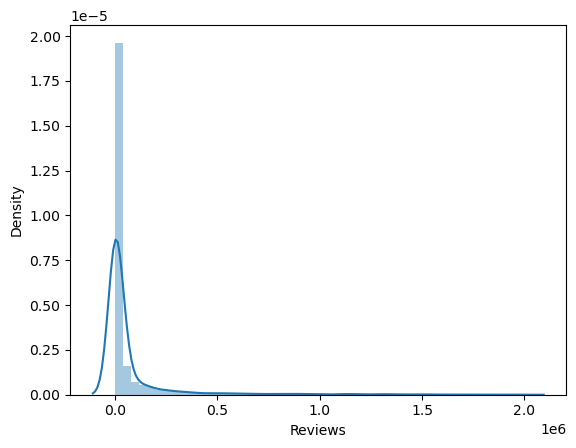

In [70]:
sns.distplot(inp1.Reviews)
plt.show()

C:\Users\Rohit Yadav\AppData\Local\Temp\ipykernel_9388\203705333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1.Installs)


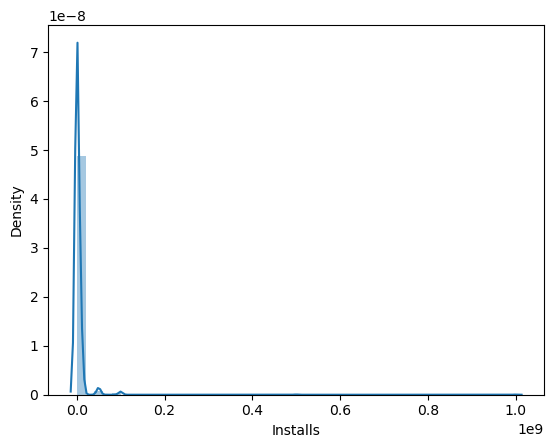

In [117]:
sns.distplot(inp1.Installs)
plt.show()

In [118]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])


C:\Users\Rohit Yadav\AppData\Local\Temp\ipykernel_9388\3368193224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1.Reviews)


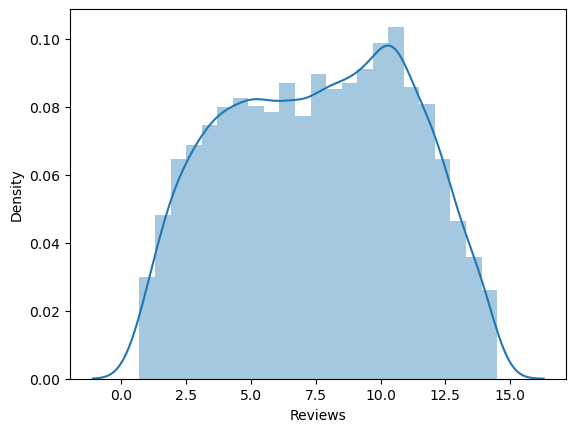

In [119]:
sns.distplot(inp1.Reviews)
plt.show()

C:\Users\Rohit Yadav\AppData\Local\Temp\ipykernel_9388\203705333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1.Installs)


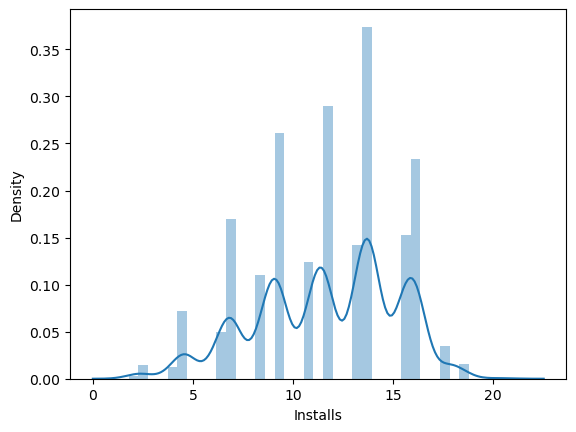

In [120]:
sns.distplot(inp1.Installs)
plt.show()

In [75]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_last'],
      dtype='object')

In [121]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating'],
      dtype='object')

Droping columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [122]:
inp2 = pd.get_dummies(inp1, columns=['Category', 'Content Rating'], dummy_na=True)

In [123]:
inp2.isnull().sum()

Rating                            0
Reviews                           0
Size                              0
Installs                          0
Price                             0
Category_ART_AND_DESIGN           0
Category_AUTO_AND_VEHICLES        0
Category_BEAUTY                   0
Category_BOOKS_AND_REFERENCE      0
Category_BUSINESS                 0
Category_COMICS                   0
Category_COMMUNICATION            0
Category_DATING                   0
Category_EDUCATION                0
Category_ENTERTAINMENT            0
Category_EVENTS                   0
Category_FAMILY                   0
Category_FINANCE                  0
Category_FOOD_AND_DRINK           0
Category_GAME                     0
Category_HEALTH_AND_FITNESS       0
Category_HOUSE_AND_HOME           0
Category_LIBRARIES_AND_DEMO       0
Category_LIFESTYLE                0
Category_MAPS_AND_NAVIGATION      0
Category_MEDICAL                  0
Category_NEWS_AND_MAGAZINES       0
Category_PARENTING          

In [124]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Category_nan,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Content Rating_nan
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [125]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(inp2, test_size=0.3, random_state=42)

In [126]:

X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']


X_test = df_test.drop('Rating', axis=1)
y_test = df_test['Rating']


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

In [128]:
model

LinearRegression()

In [129]:
model.fit(X_train, y_train)

LinearRegression()

In [130]:
y_train_pred = model.predict(X_train)

In [131]:
y_train_pred

array([4.04721437, 4.08199589, 4.0485114 , ..., 4.39180059, 4.33722772,
       4.0997656 ])

In [132]:
r2_train = r2_score(y_train, y_train_pred)
print("R2 score on train set:", r2_train)

R2 score on train set: 0.14042770472552435


In [133]:
# Predict the target variable for the test set
y_test_pred = model.predict(X_test)

In [134]:
r2_test = r2_score(y_test, y_test_pred)
print("R2 score on test set:", r2_test)

R2 score on test set: 0.11751690614802546
